## Comparing results with R

In [49]:
library(forecast)
library(tseries)

In [6]:
# sessionInfo()
packageVersion('forecast')

[1] ‘8.15’

In [7]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [8]:
df <- read_csv('../../datasets/Ch10/milk_production.csv')

Rows: 168 Columns: 2

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): production
date (1): month


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [12]:
head(df)

month,production
<date>,<dbl>
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
1962-06-01,697


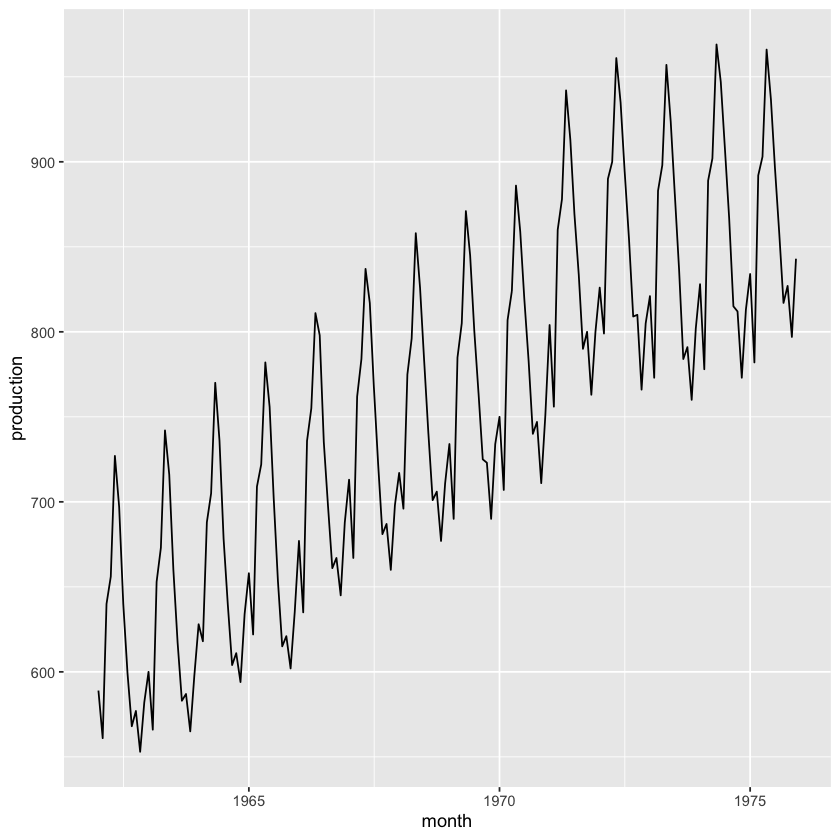

In [15]:
library(ggplot2)
library(dplyr)

# Most basic bubble plot
p <- ggplot(df, aes(x=month, y=production)) +
  geom_line() + 
  xlab("month")
p

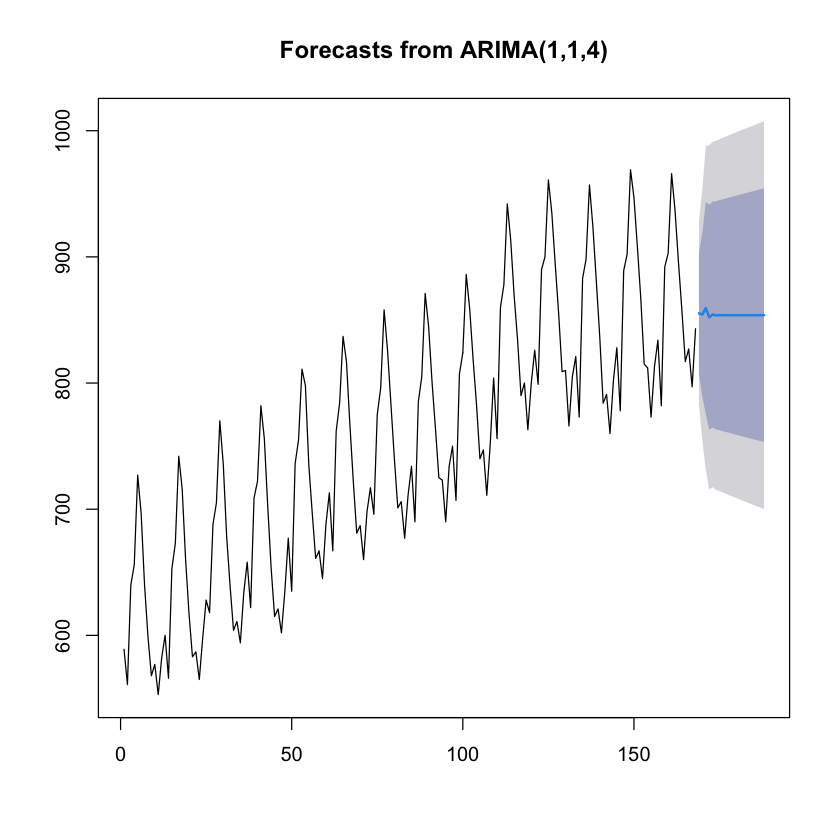

In [24]:
milk_model <- auto.arima(df$production, D=1)

# fit <- auto.arima(WWWusage)
plot(forecast(milk_model,h=20))


	Ljung-Box test

data:  Residuals from ARIMA(1,1,4)
Q* = 47.463, df = 5, p-value = 4.571e-09

Model df: 5.   Total lags used: 10



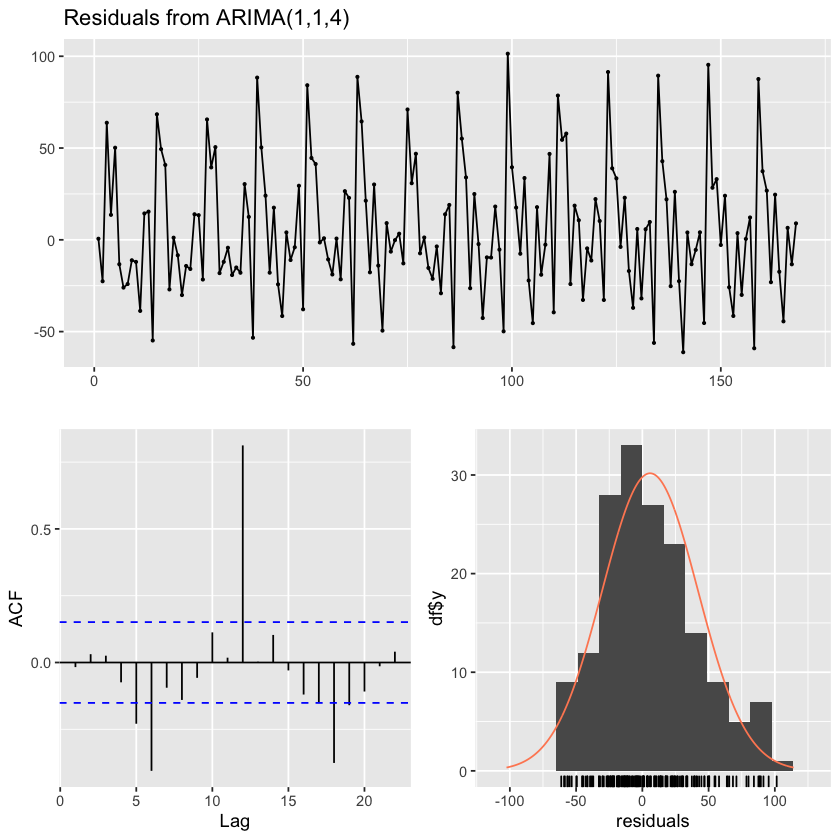

In [25]:
checkresiduals(milk_model)

In [32]:
auto.arima(df$production, max.D=2, max.d = 2)

Series: df$production 
ARIMA(1,1,4) 

Coefficients:
          ar1     ma1     ma2      ma3      ma4
      -0.3045  0.2456  0.1500  -0.4257  -0.6493
s.e.   0.1158  0.0816  0.0545   0.0486   0.0614

sigma^2 estimated as 1380:  log likelihood=-839.88
AIC=1691.77   AICc=1692.29   BIC=1710.48

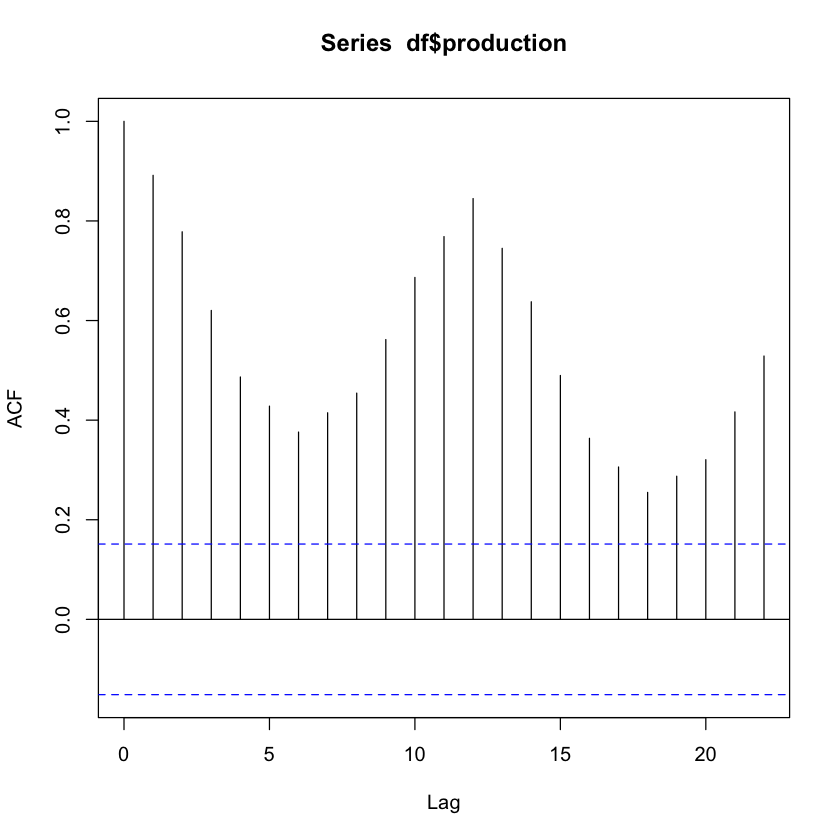

In [43]:
acf(df$production)

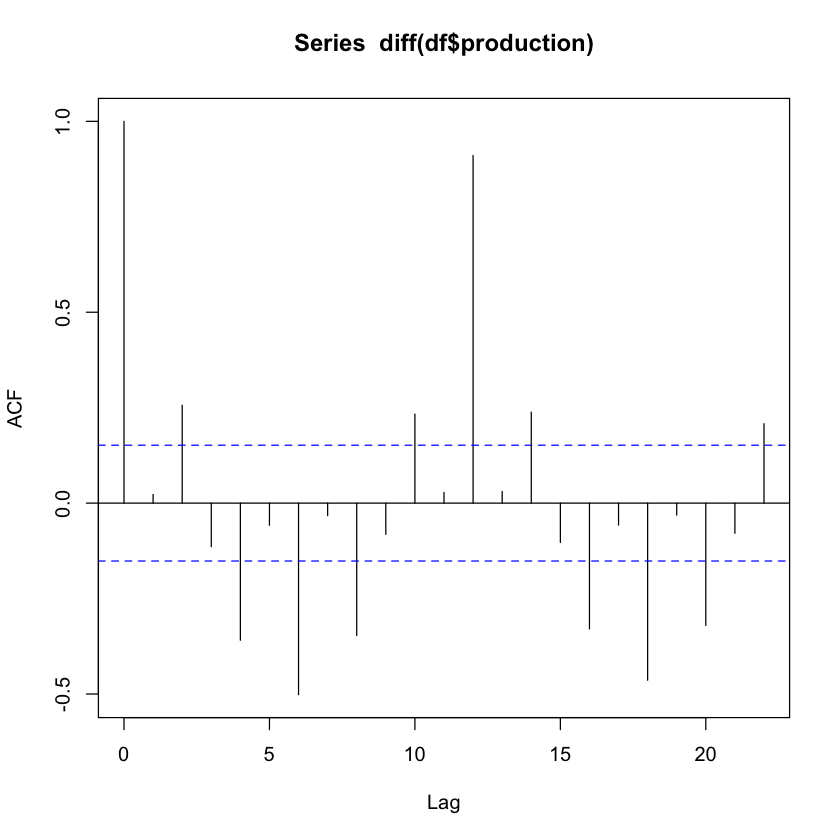

In [45]:
acf(diff(df$production))

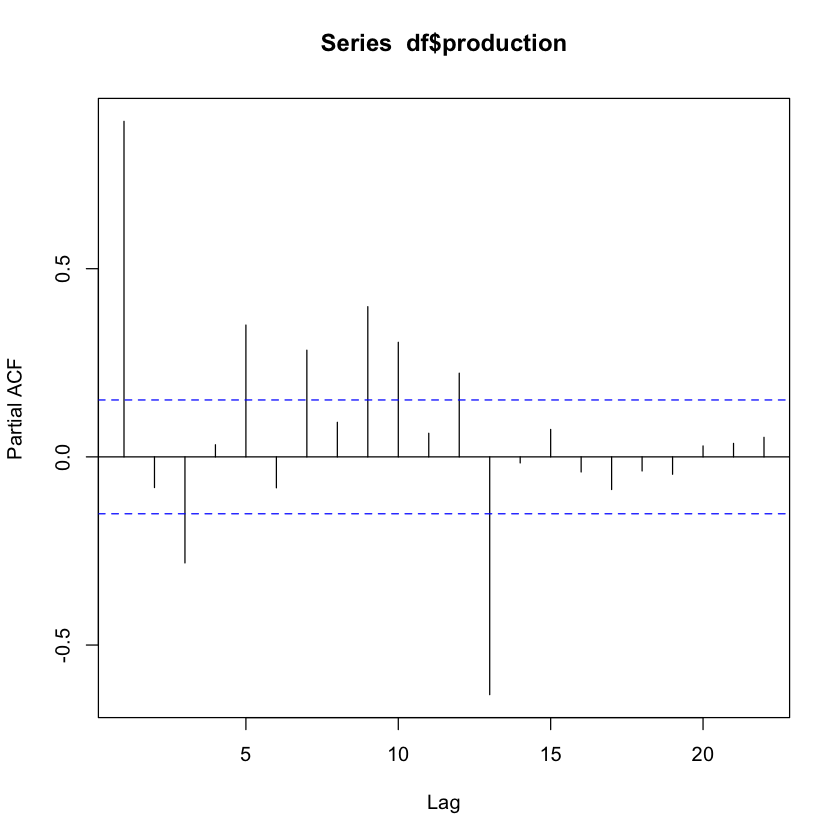

In [44]:
pacf(df$production)

In [51]:
adf.test(df$production)

Warning message in adf.test(df$production):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  df$production
Dickey-Fuller = -9.9714, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


In [53]:
df.diff <- diff(df$production)
adf.test(df.diff)

Warning message in adf.test(df.diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  df.diff
Dickey-Fuller = -9.5083, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


In [56]:
kpss.test(df$production)

Warning message in kpss.test(df$production):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  df$production
KPSS Level = 2.7659, Truncation lag parameter = 4, p-value = 0.01


In [57]:
kpss.test(df.diff)

Warning message in kpss.test(df.diff):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  df.diff
KPSS Level = 0.013806, Truncation lag parameter = 4, p-value = 0.1


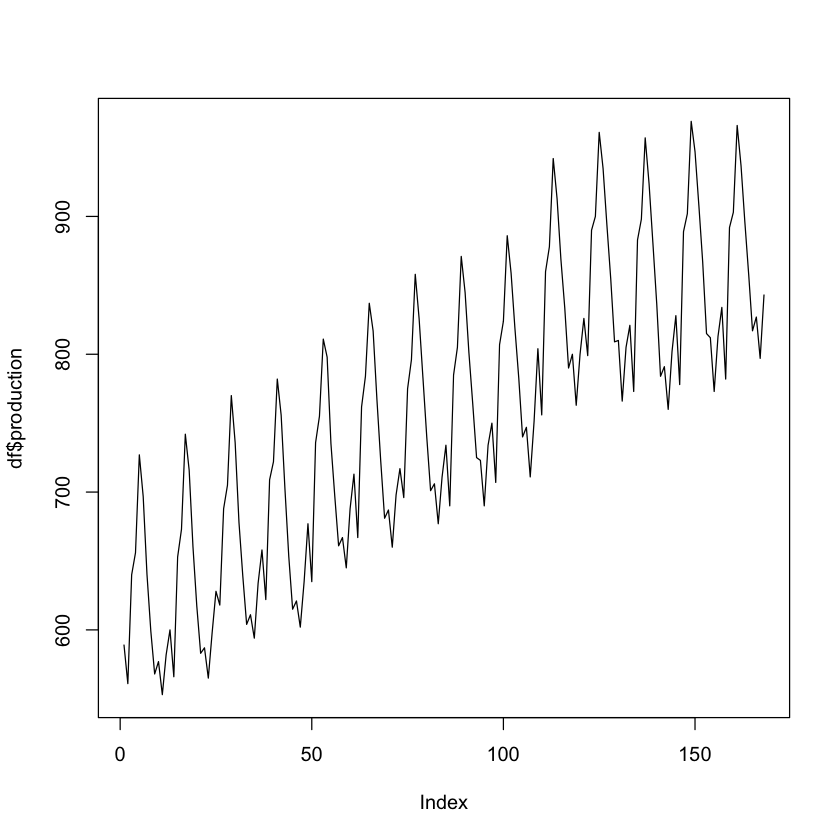

In [47]:
plot(df$production, type='l')

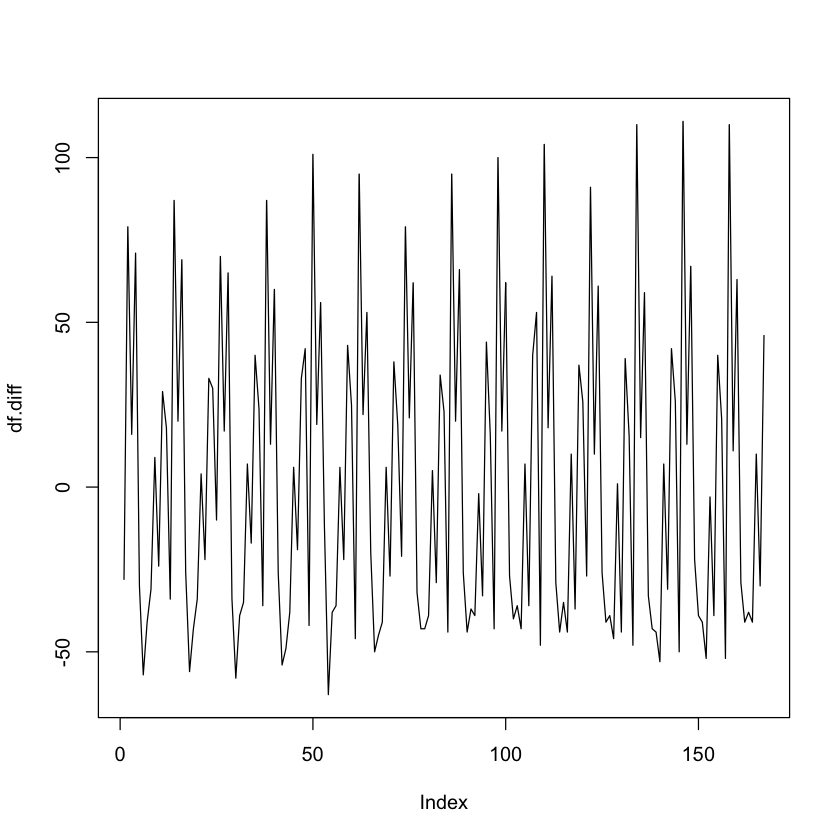

In [54]:
plot(df.diff, type='l')

In [58]:
auto.arima(df.diff)

Series: df.diff 
ARIMA(1,0,4) with zero mean 

Coefficients:
          ar1     ma1     ma2      ma3      ma4
      -0.3045  0.2456  0.1500  -0.4257  -0.6493
s.e.   0.1158  0.0816  0.0545   0.0486   0.0614

sigma^2 estimated as 1380:  log likelihood=-839.88
AIC=1691.77   AICc=1692.29   BIC=1710.48

In [63]:
auto.arima(df$production, D=1, d=1)

Series: df$production 
ARIMA(1,1,4) 

Coefficients:
          ar1     ma1     ma2      ma3      ma4
      -0.3045  0.2456  0.1500  -0.4257  -0.6493
s.e.   0.1158  0.0816  0.0545   0.0486   0.0614

sigma^2 estimated as 1380:  log likelihood=-839.88
AIC=1691.77   AICc=1692.29   BIC=1710.48